<a href="https://colab.research.google.com/github/mayankbhati6055/Retail-sales-prediction-supervised/blob/main/final_Mayank_Capstone_Project_Of_Retail_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Retail Sales Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -** Mayank Bhati


# **Project Summary -**

This dataset is an actual Rossmann Stores dataset. When we analyse this issue, we find that Rossmann problem is a regression issue, and our main objective is to forecast Rossmann problem's sales statistics. The following subjects are covered in this notebook:
Exploratory data analysis is used to analyse the dataset. Examine trends and seasonality in the Roseman dataset using exponential moving averages. Analyse Using the following forecast analysis, perform regression A. Linear Regression Analysis B. Elastic Regression ( Lasso and Ridge Regression). C. Random Forest Regression. d.adaboost and Xgboost).

By applying above algorthim we find accuracy of 98% by Xgboost.



# **GitHub Link -**

# **Problem Statement**


Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment. Data Description Rossmann Stores Data.csv - historical data including Sales store.csv - supplemental information about the stores Data fields Most of the fields are self-explanatory. Id - an Id that represents a (Store) duple within the set Store - a unique Id for each store Sales - the turnover for any given day (Dependent Variable) Customers - the number of customers on a given day

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
from ast import increment_lineno
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
import plotly.express as px
import ast
import math
import random

from scipy.stats import skew
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression , Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
import pickle
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [3]:
#Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Loading Rossman Dataset
Rossman_df = pd.read_csv('/content/drive/MyDrive/almabetter/Retail Sales Prediction csv/Rossmann Stores Data.csv')

#store data
store_df = pd.read_csv('/content/drive/MyDrive/almabetter/Retail Sales Prediction csv/store (1).csv')


### Dataset First View

In [5]:
# Dataset First Look
Rossman_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
Rossman_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
print(Rossman_df.index)
print('/n')
print(Rossman_df.columns)

RangeIndex(start=0, stop=1017209, step=1)
/n
Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')


In [8]:
Rossman_df.shape

(1017209, 9)

### Dataset Information

In [9]:
# Dataset Info
Rossman_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [10]:
Rossman_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [11]:
# change datatype object into date format
Rossman_df['Date'].unique()

array(['2015-07-31', '2015-07-30', '2015-07-29', '2015-07-28',
       '2015-07-27', '2015-07-26', '2015-07-25', '2015-07-24',
       '2015-07-23', '2015-07-22', '2015-07-21', '2015-07-20',
       '2015-07-19', '2015-07-18', '2015-07-17', '2015-07-16',
       '2015-07-15', '2015-07-14', '2015-07-13', '2015-07-12',
       '2015-07-11', '2015-07-10', '2015-07-09', '2015-07-08',
       '2015-07-07', '2015-07-06', '2015-07-05', '2015-07-04',
       '2015-07-03', '2015-07-02', '2015-07-01', '2015-06-30',
       '2015-06-29', '2015-06-28', '2015-06-27', '2015-06-26',
       '2015-06-25', '2015-06-24', '2015-06-23', '2015-06-22',
       '2015-06-21', '2015-06-20', '2015-06-19', '2015-06-18',
       '2015-06-17', '2015-06-16', '2015-06-15', '2015-06-14',
       '2015-06-13', '2015-06-12', '2015-06-11', '2015-06-10',
       '2015-06-09', '2015-06-08', '2015-06-07', '2015-06-06',
       '2015-06-05', '2015-06-04', '2015-06-03', '2015-06-02',
       '2015-06-01', '2015-05-31', '2015-05-30', '2015-

In [12]:
# changing Sate value holiday a,b,c is equal to 1

Rossman_df['StateHoliday'].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [13]:
Rossman_df.isnull().sum()


Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [14]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


## 3. ***Data Wrangling***

### missing values/null values

In [15]:
#CompetitionDistance:- distance to the closest competitor store in metres.

Rossman_df['SchoolHoliday'].unique()

array([1, 0])

In [16]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [17]:
j = ["DayOfWeek", "StateHoliday", "SchoolHoliday"]

for i in j:
    print(i)
    print(Rossman_df[i].unique())
    print("  ")


DayOfWeek
[5 4 3 2 1 7 6]
  
StateHoliday
['0' 'a' 'b' 'c' 0]
  
SchoolHoliday
[1 0]
  


In [18]:
store_df.nunique()

Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64

In [19]:
# STORE DATASET FILL INTO NULL VALUES THAT'S 0

store_df['CompetitionDistance'] = store_df['CompetitionDistance'].fillna(0)
store_df['CompetitionOpenSinceYear'] = store_df['CompetitionOpenSinceYear'].fillna(0)
store_df['CompetitionOpenSinceMonth'] = store_df['CompetitionOpenSinceMonth'].fillna(0)
store_df['Promo2SinceWeek'] = store_df['Promo2SinceWeek'].fillna(0)
store_df['Promo2SinceYear'] = store_df['Promo2SinceYear'].fillna(0)
store_df['PromoInterval'] = store_df['PromoInterval'].fillna(0)


In [20]:
store_df.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [21]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1112,1113,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1113,1114,a,c,870.0,0.0,0.0,0,0.0,0.0,0


In [22]:
merge1 = pd.merge(Rossman_df , store_df , on= 'Store' , how='left')


In [23]:
merge1

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,0.0,0.0,0,0.0,0.0,0


In [24]:
merge1.duplicated().sum()

0

In [25]:
#Change data types object to int

merge1.loc[merge1['StateHoliday'] == '0' , 'StateHoliday'] = 0
merge1.loc[merge1['StateHoliday'] == 'a' , 'StateHoliday'] = 1
merge1.loc[merge1['StateHoliday'] == 'b' , 'StateHoliday'] = 2
merge1.loc[merge1['StateHoliday'] == 'c' , 'StateHoliday'] = 3

# store the value using the function astype and the same column name, StateHoliday.

merge1['StateHoliday'] = merge1['StateHoliday'].astype(int,copy= False)

In [26]:
#Change data types object to int

merge1.loc[merge1['Assortment'] == 'a' , 'Assortment'] = 0
merge1.loc[merge1['Assortment'] == 'b' , 'Assortment'] = 1
merge1.loc[merge1['Assortment'] == 'c' , 'Assortment'] = 2
merge1.loc[merge1['Assortment'] == 'd' , 'Assortment'] = 3

# store the value using the function astype and the same column name, Assortment.

merge1['Assortment'] = merge1['Assortment'].astype(int,copy= False)

In [27]:
#Change data types object to int

merge1.loc[merge1['StoreType'] == 'a' , 'StoreType'] = 0
merge1.loc[merge1['StoreType'] == 'b' , 'StoreType'] = 1
merge1.loc[merge1['StoreType'] == 'c' , 'StoreType'] = 2
merge1.loc[merge1['StoreType'] == 'd' , 'StoreType'] = 3

# store the value using the function astype and the same column name, StoreType.

merge1['StoreType'] = merge1['StoreType'].astype(int,copy= False)

In [28]:
print(merge1[['StateHoliday', 'Assortment' , 'StoreType']].nunique())

StateHoliday    4
Assortment      3
StoreType       4
dtype: int64


In [29]:
merge1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  int64  
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  int64  
 10  Assortment                 1017209 non-null  int64  
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [30]:
merge1["Sales"].value_counts()

0        172871
5674        215
5558        197
5483        196
6214        195
          ...  
23806         1
24183         1
20651         1
25083         1
23303         1
Name: Sales, Length: 21734, dtype: int64

In [31]:
# changing date format from object to date time

merge1['Date'] = pd.to_datetime(merge1['Date'], format = '%Y-%m-%d')

In [32]:
# change object into date format

merge1['CompetitionOpenSinceMonth'] = pd.DatetimeIndex(merge1['Date']).month

In [33]:
# change float into integer

merge1['CompetitionOpenSinceYear'] = merge1['CompetitionOpenSinceYear'].astype(int)
merge1['Promo2SinceYear'] = merge1['Promo2SinceYear'].astype(int)
merge1['CompetitionDistance'] = merge1['CompetitionDistance'].astype(int)
merge1['Promo2SinceWeek'] = merge1['Promo2SinceWeek'].astype(int)

In [34]:
merge1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  int64         
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  int64         
 10  Assortment                 1017209 non-null  int64         
 11  CompetitionDistance        1017209 no

### 2-Understanding Your Variable

In [35]:
merge1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2,0,1270,7,2008,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,0,570,7,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,0,0,14130,7,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,2,620,7,2009,0,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,0,29910,7,2015,0,0,0,0


In [36]:
merge1.describe().apply(lambda x : round(x,2))

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1017209.00,1017209.0,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.0,1017209.00,1017209.00
mean,558.43,4.0,5773.82,633.15,0.83,0.38,0.05,0.18,1.21,0.94,5415.98,5.85,1370.17,0.5,11.65,1007.01
std,321.91,2.0,3849.93,464.41,0.38,0.49,0.28,0.38,1.37,0.99,7710.25,3.33,935.36,0.5,15.32,1005.88
min,1.00,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.0,0.00,0.00
25%,280.00,2.0,3727.00,405.00,1.00,0.00,0.00,0.00,0.00,0.00,700.00,3.00,0.00,0.0,0.00,0.00
50%,558.00,4.0,5744.00,609.00,1.00,0.00,0.00,0.00,0.00,0.00,2320.00,6.00,2006.00,1.0,1.00,2009.00
75%,838.00,6.0,7856.00,837.00,1.00,1.00,0.00,0.00,3.00,2.00,6880.00,8.00,2011.00,1.0,22.00,2012.00
max,1115.00,7.0,41551.00,7388.00,1.00,1.00,3.00,1.00,3.00,2.00,75860.00,12.00,2015.00,1.0,50.00,2015.00


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

 line chart

Text(0.5, 1.0, 'Plot between Sales and Competition Open Since year')

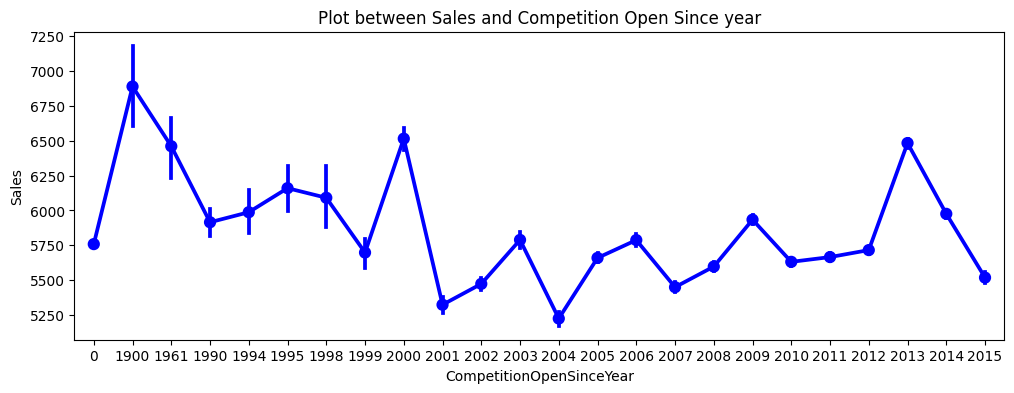

In [37]:
# Chart - 1 visualization code

plt.figure(figsize=(12,4))
sns.pointplot(x= 'CompetitionOpenSinceYear', y= 'Sales', data=merge1,color='blue')
sns.set_style("darkgrid")
plt.title('Plot between Sales and Competition Open Since year')

**This figure reveals that sales peaked around 1900 due to the low level of competition at the time and the small number of stores available. However, as time goes on, fewer stores open, which means that competition has also grown, which has led to an annual decline in sales.**

#### Chart - 2

Text(0.5, 1.0, 'Plot between sales and Promo2SinceYear')

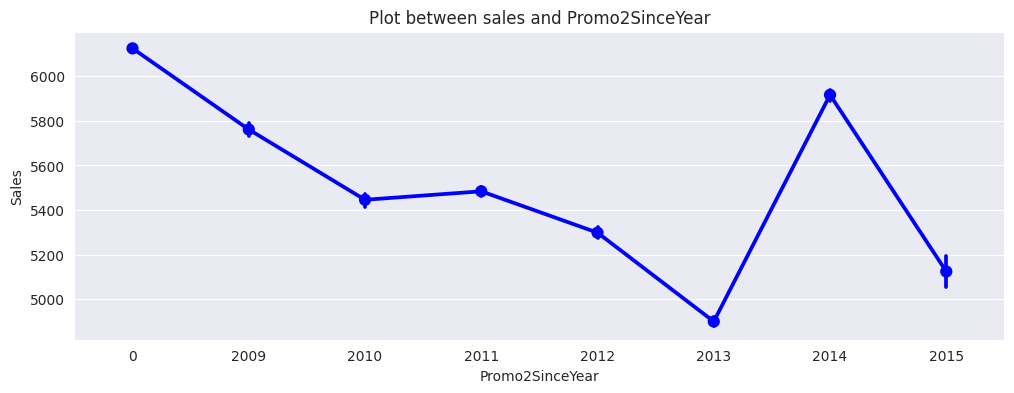

In [38]:
# Chart - 2 visualization code

plt.figure(figsize=(12,4))
sns.pointplot(x= 'Promo2SinceYear', y= 'Sales', data= merge1, color='blue')
sns.set_style("darkgrid")
plt.title('Plot between sales and Promo2SinceYear')

**Due to this Graph We observed that retail sales are impacted, which keeps their advertising going.Despite promotions, sales in 2013 and 2015 were very poor.The cause might be increased competition over time.**

#### Chart - 3

Text(0.5, 1.0, 'Plot between sales and DayofWeek')

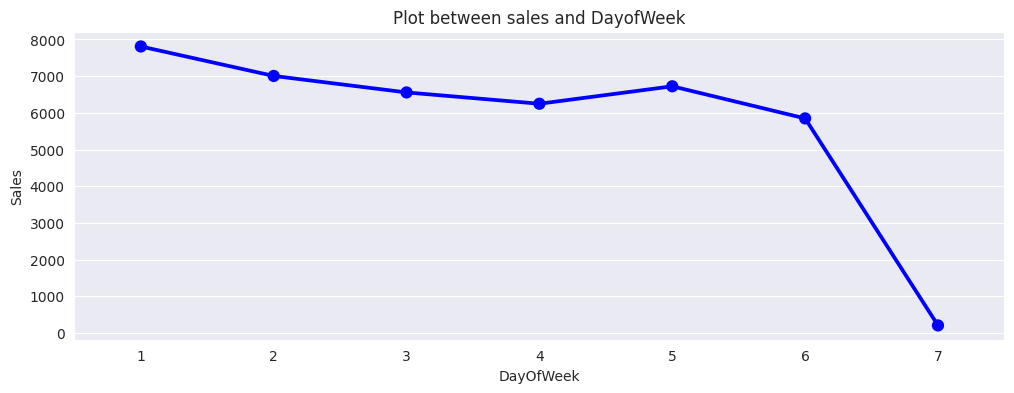

In [39]:
# Chart - 3 visualization code
plt.figure(figsize=(12,4))
sns.pointplot(x= 'DayOfWeek', y= 'Sales', data= merge1, color='blue')
sns.set_style("darkgrid")
plt.title('Plot between sales and DayofWeek')

**This graph reveals that Monday is the day with the highest sales, and that number decreases until Saturday, the sixth day.Day 7 is a Sunday, when the majority of stores are closed, hence there are no sales.**

#### Chart - 4

Text(0.5, 1.0, 'Plot between sales and CompetitionOpenSinceMonth')

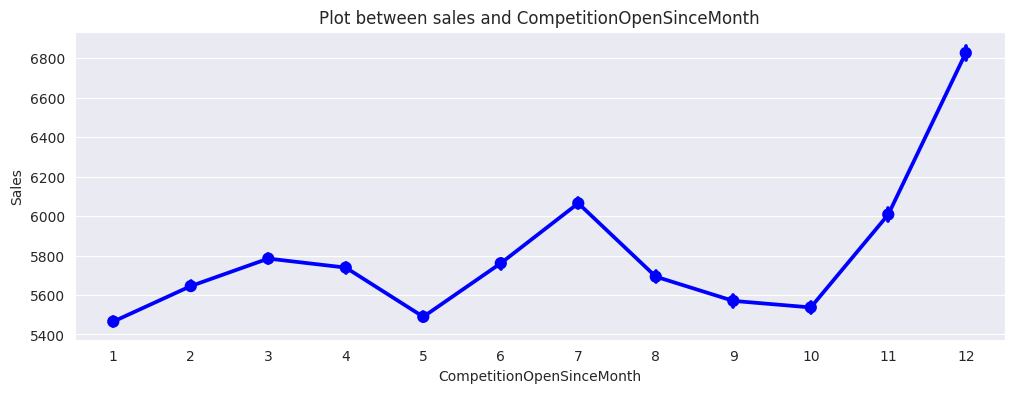

In [40]:
# Chart - 4 visualization code
plt.figure(figsize=(12,4))
sns.pointplot(x= 'CompetitionOpenSinceMonth', y= 'Sales', data= merge1, color='blue')
sns.set_style("darkgrid")
plt.title('Plot between sales and CompetitionOpenSinceMonth')

#### Chart - 5

Text(0.5, 1.0, 'Boxplot For Sales Values')

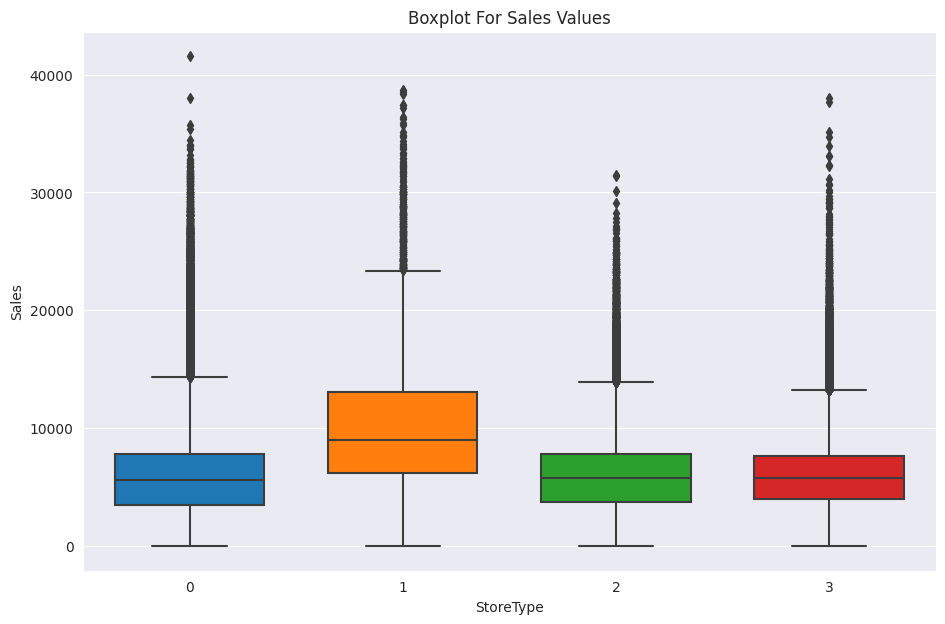

In [41]:
# Chart - 5 visualization code

plt.figure(figsize=(11,7))
plot_storetype_sales = sns.boxplot(x="StoreType", y= "Sales", data=merge1 , saturation= 1.4, width = 0.7)
plt.title('Boxplot For Sales Values')

#### Chart - 6

Text(0.5, 1.0, 'Boxplot For Sales Values on the basis of assortment')

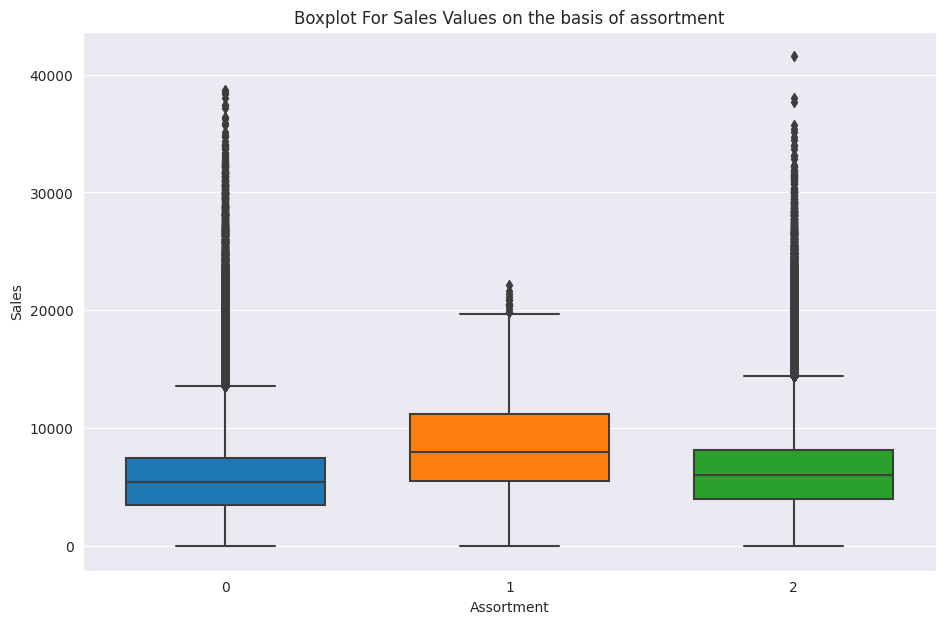

In [42]:
# Chart - 6 visualization code
plt.figure(figsize=(11,7))
plot_storetype_sales = sns.boxplot(x="Assortment", y= "Sales", data=merge1 , saturation= 1.4, width = 0.7)
plt.title('Boxplot For Sales Values on the basis of assortment')


#### Chart - 7

Text(0.5, 1.0, 'store daily open countplot')

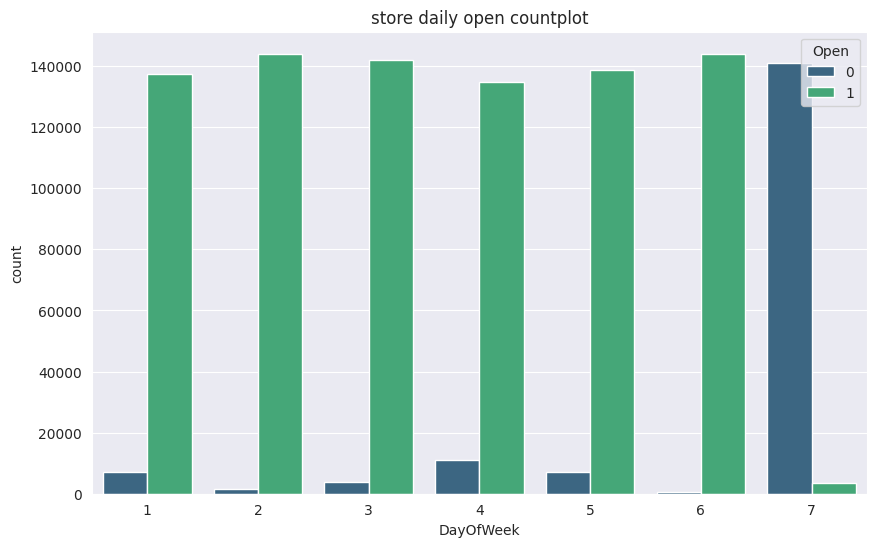

In [43]:
# Chart - 7 visualization code
plt.figure(figsize=(10,6))
sns.countplot(x = 'DayOfWeek', hue= 'Open', data= merge1, palette = 'viridis')
plt.title('store daily open countplot')

#### Chart - 8

Text(0.5, 1.0, 'store daily open countplot')

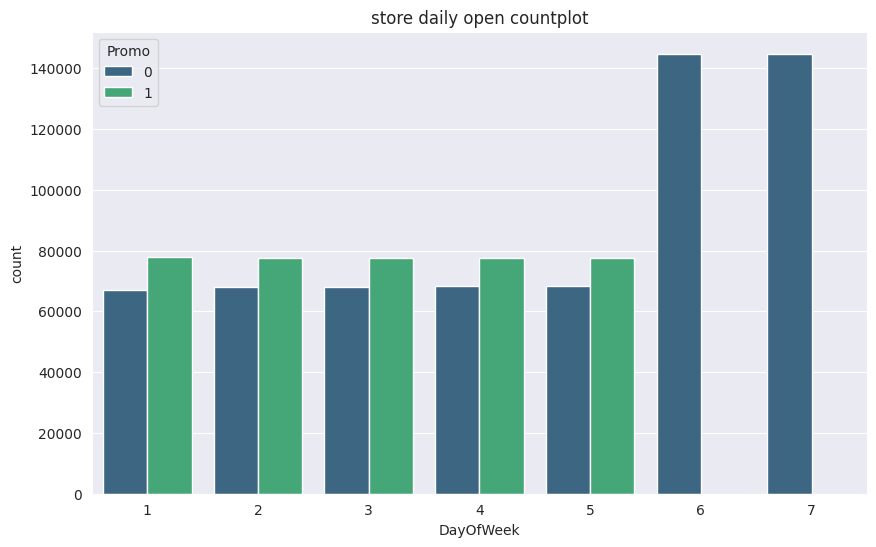

In [44]:
# Chart - 8 visualization code
plt.figure(figsize=(10,6))
sns.countplot(x = 'DayOfWeek', hue= 'Promo', data= merge1, palette = 'viridis')
plt.title('store daily open countplot')

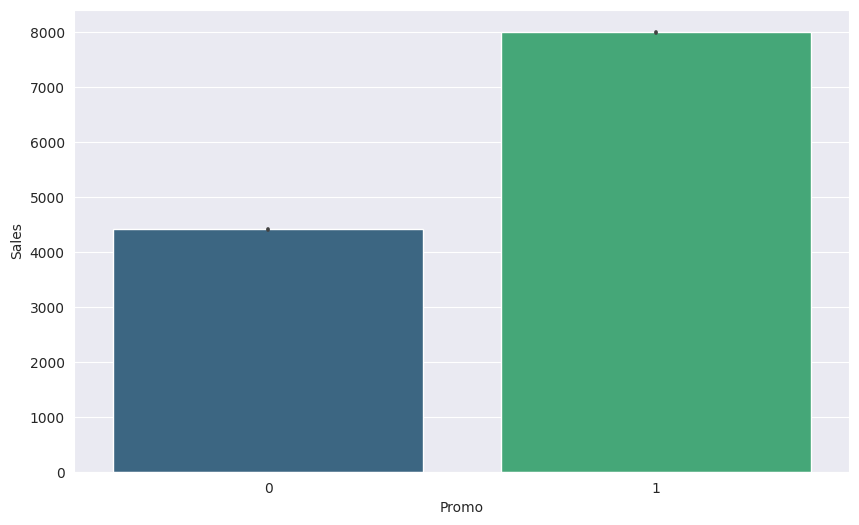

In [45]:
plt.figure(figsize=(10, 6))
promo_sales = sns.barplot(x="Promo", y="Sales", data=merge1, palette='viridis')

**Here, 0 denotes a store that chose not to participate in a promotion and 1 denotes a retailer that participated. Sales at the stores that participated in promotions were higher than those at the stores that did not.**

#### **State Holiday**

** 0 = public holiday, 1 = easter holiday , 2= christmas , 3 = none**

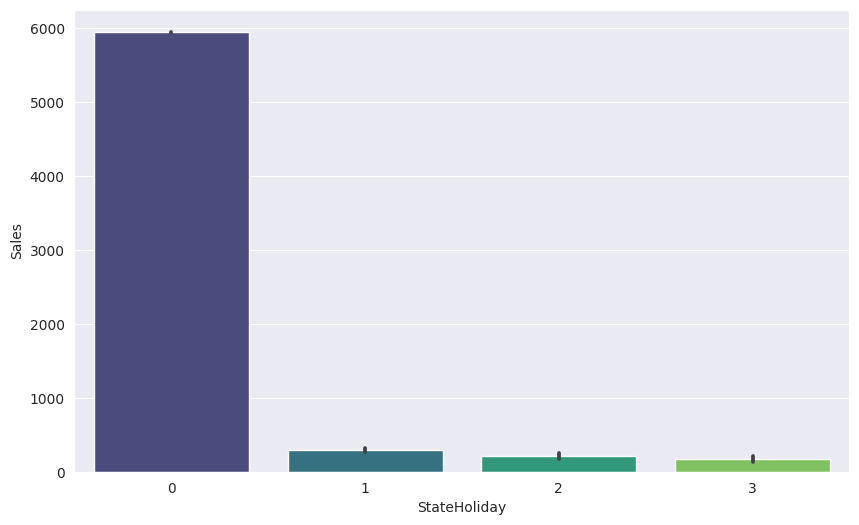

In [46]:
plt.figure(figsize = (10,6))
stateholiday_sales = sns.barplot(x= "StateHoliday", y= "Sales" , data = merge1 , palette = 'viridis')

## **School Holiday**

**0='Not Holiday', 1='Holiday'**

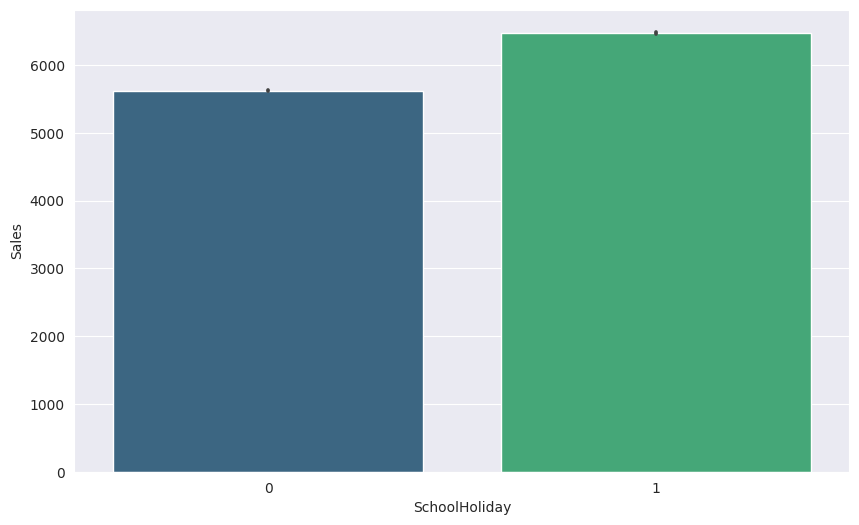

In [47]:
plt.figure(figsize=(10, 6))
stateholiday_sales = sns.barplot(x="SchoolHoliday", y="Sales", data=merge1,palette='viridis')

**We can see that most businesses are closed on recognised holidays and state holidays. However, it's noteworthy to notice that more stores were open during school breaks than during state holidays. The fact that retailers open during school breaks saw higher than usual sales is another crucial point to note.**

# **Conclusion of EDA**


1) From plot sales and rivalry Open Since the month indicates, sales started to rise in November and peaked in December.

2) According to the plot's sales and day of the week, sales are at their maximum on Monday and begin to decline from Tuesday through Saturday. On Sunday, sales are virtually at zero.

3) The relationship between promotion and sales demonstrates how promotion aids in boosting sales.

4) The type of store has a significant impact on the timing of store openings.

5) Apart from for renovations or other reasons, none of the Type 'b' stores ever closed.

6) Sales are generally stable and greater in all Type "b" stores, with peaks occurring on weekends.

7)Only Store Type 'b' offers Selection Level 'b'.


8) During State Holidays, the majority of the businesses are closed, as may be seen. However, it's noteworthy to notice that more stores were open during school breaks than during state holidays.

# **5-Hypothesis Testing**

**Hypothetical Statement - 1**

## **MODEL 1 (excluding rows which has sales =0)**

## **Hypothetical Statement - 2**

# **MODEL 2 (By taking whole Dataset)**

## ***6. Feature Engineering & Data Pre-processing***

<Axes: >

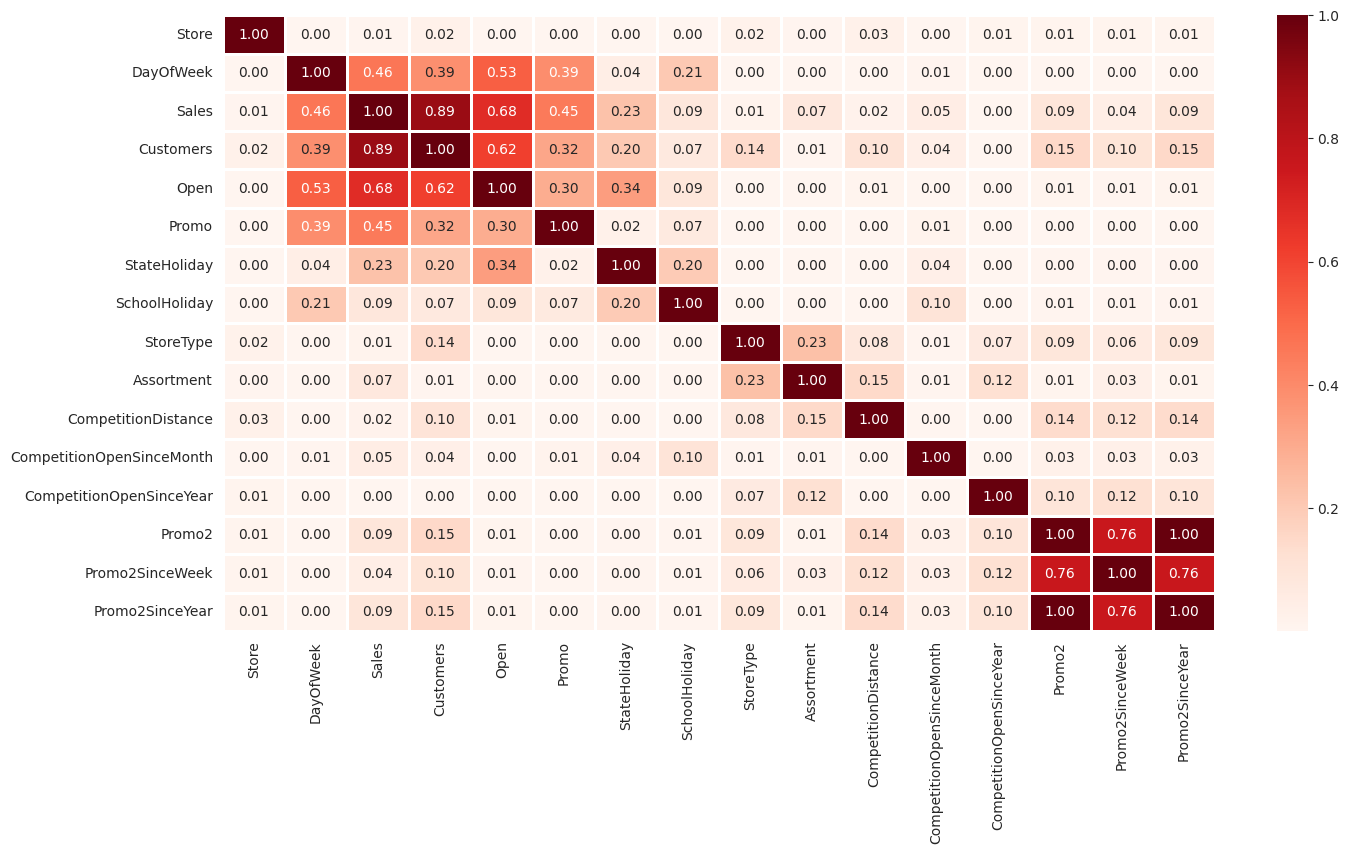

In [48]:
plt.figure(figsize=(16,8))
correlation = merge1.corr()
sns.heatmap(abs(correlation), annot=True, cmap='Reds',linewidths=2,fmt=".2f")

**The colour of the cell reflects the direction and degree of the connection: a warm colour (such as Red) denotes a positive correlation, while a cold colour (such as Orange) denotes a negative correlation.The intensity of the color represents the strength of the correlation.**

##**Multicollinearity**

## Multicollinearity is a statistical term that refers to the situation where two or more predictor variables in a regression model are highly correlated with each other.

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


In [50]:
calc_vif(merge1[[i for i in merge1.describe().columns if i not in ['Sales']]])

,variables,VIF
0,Store,3.698820e+00
1,DayOfWeek,4.104634e+00
2,Customers,5.236586e+00
3,Open,9.374439e+00
4,Promo,1.917193e+00
5,StateHoliday,1.187974e+00
6,SchoolHoliday,1.330848e+00
7,StoreType,1.940267e+00
8,Assortment,2.045386e+00
9,CompetitionDistance,1.589466e+00


**The VIF (Variance Inflation Factor) value for columns Promo2 and Promo2SinceYear in the above table is higher.Therefore, we will drop either Promo2 or Promo2SinceYear and recheck the VIF value.We now remove the Promo2 column.**

In [51]:
calc_vif(merge1[[i for i in merge1.describe().columns if i not in ['Sales','Promo2']]])

,variables,VIF
0,Store,3.696388
1,DayOfWeek,4.104282
2,Customers,5.236066
3,Open,9.373305
4,Promo,1.917150
5,StateHoliday,1.187974
6,SchoolHoliday,1.330831
7,StoreType,1.934410
8,Assortment,2.039789
9,CompetitionDistance,1.583028


**For a machine learning model, a VIF factor of less than 10 is  good**

# **Analysis of Target Variable i.e 'Sales'.**

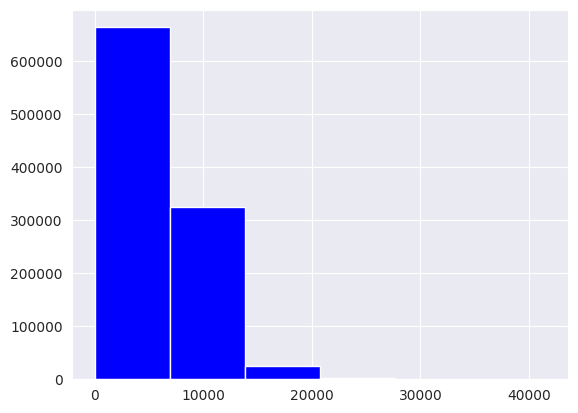

In [52]:
pd.Series(merge1['Sales'],).hist(bins= 6, color = 'blue')
plt.show()

In [53]:
merge1[(merge1.Open == 0) & (merge1.Sales == 0)].count()[0]

172817

**In order to train the model more properly, we will remove those stores whose sales are zero and assume that they were temporarily closed.**

In [54]:
again_df = merge1.drop(merge1[(merge1.Open == 0) & (merge1.Sales==0)].index)

In [55]:
again_df.shape

(844392, 18)

In [56]:
again_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2,0,1270,7,2008,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,0,570,7,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,0,0,14130,7,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,2,620,7,2009,0,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,0,29910,7,2015,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,1,1,1,0,150,1,2006,0,0,0,0
1016827,733,2,2013-01-01,10765,2377,1,0,1,1,1,1,860,1,1999,0,0,0,0
1016863,769,2,2013-01-01,5035,1248,1,0,1,1,1,1,840,1,0,1,48,2012,"Jan,Apr,Jul,Oct"
1017042,948,2,2013-01-01,4491,1039,1,0,1,1,1,1,1430,1,0,0,0,0,0


**In again_df dataset,column name 'PromoInterval' change into dummies it means that each new column will have a binary value (0 or 1).**

In [57]:
again_df = pd.get_dummies(again_df, columns =['PromoInterval'])

In [58]:
again_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0,1,2,...,1270,7,2008,0,0,0,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,...,570,7,2007,1,13,2010,0,0,1,0
2,3,5,2015-07-31,8314,821,1,1,0,1,0,...,14130,7,2006,1,14,2011,0,0,1,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,...,620,7,2009,0,0,0,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,...,29910,7,2015,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,1,1,1,...,150,1,2006,0,0,0,1,0,0,0
1016827,733,2,2013-01-01,10765,2377,1,0,1,1,1,...,860,1,1999,0,0,0,1,0,0,0
1016863,769,2,2013-01-01,5035,1248,1,0,1,1,1,...,840,1,0,1,48,2012,0,0,1,0
1017042,948,2,2013-01-01,4491,1039,1,0,1,1,1,...,1430,1,0,0,0,0,1,0,0,0


In [59]:

again_df.to_csv('cleandata.csv', index = False)

In [60]:
merge1.to_csv('cleandata.csv', index = False)

## ***7. ML Model Implementation***

### MODEL TRAINING

In [61]:
from scipy.stats import zscore
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from scipy.sparse.linalg._eigen import test

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
import math
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix,classification_report



# **MODEL 1 (excluding rows which has sales =0)**


As we have two dataset,first one having sales = '0' rows and another exculding it. We will both the data and find the best model.

**First We will take dataset excluding Sales = '0' rows.**

In [62]:
# defining dependent variable

dependent_variables = 'Sales'

# defining independent variable

independent_variables = list(again_df.columns.drop(['Promo2SinceYear', 'Date', 'Sales']))

In [63]:
# independent variables

independent_variables

['Store',
 'DayOfWeek',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'PromoInterval_0',
 'PromoInterval_Feb,May,Aug,Nov',
 'PromoInterval_Jan,Apr,Jul,Oct',
 'PromoInterval_Mar,Jun,Sept,Dec']

In [64]:
# creating a data of independent variables
X = again_df[independent_variables].values

In [65]:
# creating a data of dependent variables
y = again_df[dependent_variables].values

In [66]:

# splitting the dataset
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size= 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(675513, 18)
(168879, 18)


In [67]:
# here we train the model

reg = LinearRegression().fit(X_train, y_train)

In [68]:
# regression score i.e r-squared value
reg.score(X_train, y_train)

0.7635183725690666

In [69]:
# coeffiecent of diffrent independent variable

reg.intercept_

700.1749140828606

In [70]:
# predicting dependent variable with test dataset that is 20%
y_pred = reg.predict(X_test)
y_pred

array([5324.59975349, 4849.47506442, 7238.44230268, ..., 4098.19887156,
       7772.83233987, 5368.22125565])

In [71]:
# original test dependent value
y_test

array([ 5495,  5472,  7969, ...,  2938, 10413,  5828])

In [72]:
# predicting on train dataset

y_pred_train = reg.predict(X_train)
y_pred_train

array([5490.61068489, 6804.3787408 , 6699.04311466, ..., 7913.72781806,
       6884.64407492, 6123.05554455])

In [73]:
# dependent variable on train dateset i.e 80 %
y_train

array([5409, 7339, 7807, ..., 4817, 6194, 5862])

In [74]:

#calculate mse and rmse for test prediction

Mse = mean_squared_error(y_test ,y_pred)
print("MSE:", Mse)

Rmse = np.sqrt(Mse)
print("RMSE:", Rmse)

MSE: 2265528.631712661
RMSE: 1505.1673102059656


In [75]:
r2 = r2_score(y_test ,y_pred)
print("R2:", r2)

R2: 0.7634783399226589


In [76]:
pd.DataFrame(zip(y_test, y_pred),columns = ['actual', 'pred'])

,actual,pred
0,5495,5324.599753
1,5472,4849.475064
2,7969,7238.442303
3,7384,6085.227240
4,13212,7829.105207
...,...,...
168874,16337,16398.115914
168875,9195,7062.744213
168876,2938,4098.198872
168877,10413,7772.832340


In [77]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 6.2 MB/s eta 0:00:00


In [78]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283838 sha256=32308508707f8c1290da7de909bb40371b30420be10e4fc7157914aeee0068e7
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


# **SHAP and LIME**

In [79]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import shap
import lime
import lime.lime_tabular



In [80]:
# load the Rossman dataset
data = pd.read_csv("/content/cleandata.csv", low_memory=False)

# convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# extract year, month, and day of week from 'Date' column
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['DayOfWeek'] = data['Date'].dt.dayofweek

In [81]:
# select relevant features
features = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Year', 'Month','Assortment']

In [82]:

# split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data['Sales'], test_size=0.2, random_state=42)


In [83]:
# create a linear regression model
model = LinearRegression()

# train the model on the training set
model.fit(X_train, y_train)


LinearRegression()

In [84]:
# create a SHAP explainer object
explainer = shap.LinearExplainer(model, X_train, feature_dependence="independent")

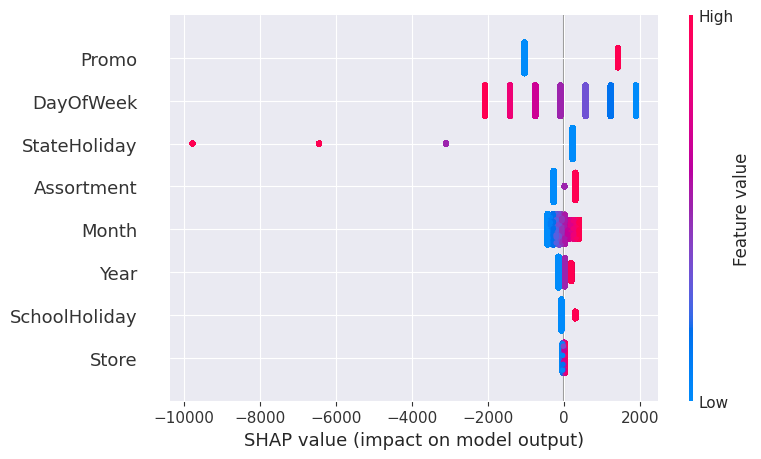

[('Year > 2014.00', 175319.4450556876), ('StateHoliday <= 0.00', 14377.941435780775), ('0.00 < Assortment <= 2.00', -5480.744236108459), ('3.00 < Month <= 6.00', 4978.60026726046)]


In [85]:
# calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# plot the SHAP values for the first feature of the first test instance
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

# create a LIME explainer object
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['Sales'], mode='regression')

# explain the prediction for the first test instance using LIME
exp = explainer.explain_instance(X_test.values[0], model.predict, num_features=4)

# print the LIME explanation
print(exp.as_list())

**#SHAP:- SHapley Additive exPlanations**

**#LIME:- Local Interpretable Model-Agnostic Explanations**





**SHAP**

**Calculating the relative importance of each feature to the anticipated output allows for the creation of SHAP values, which are used to explain the output of machine learning models.**

**LIME**

**LIME is a different method for describing a machine learning model's output by simulating the model's behaviour close to the instance.**

### **LASSO**

In [86]:
from sklearn.model_selection import cross_val_score
L1 = Lasso(alpha = 0.4 , max_iter = 10000, selection = 'cyclic', tol= 0.0001)

In [87]:
L1.fit(X_train, y_train)

Lasso(alpha=0.4, max_iter=10000)

In [88]:
y_pred_lasso = L1.predict(X_test)

In [89]:
L1.score(X_test, y_test)

0.3668859076579434

In [90]:
cv_scores = cross_val_score(L1, X, y, cv=10)
mean_cv_score = cv_scores.mean()

In [91]:
cv_scores

array([0.73075467, 0.74886334, 0.760761  , 0.75799899, 0.75829695,
       0.76481454, 0.76725115, 0.75273622, 0.7581241 , 0.78478933])

In [92]:
mean_cv_score

0.7584390301539468

In [93]:
from sklearn.model_selection import GridSearchCV, cross_val_score
# define the range of alpha values to test
parameters = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5]}

# perform grid search to find the best alpha value
lasso_cv = GridSearchCV(L1, parameters, cv=5)
lasso_cv.fit(X, y)

GridSearchCV(cv=5, estimator=Lasso(alpha=0.4, max_iter=10000),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5]})

In [94]:
# extract the best alpha value and corresponding score

most_suitable_alpha_lasso = lasso_cv.best_params_['alpha']
most_suitable_score_lasso= lasso_cv.best_score_

In [95]:
most_suitable_alpha_lasso

0.2

In [96]:
most_suitable_score_lasso

0.7605720937492583

In [97]:
pd.DataFrame(zip(y_test, y_pred_lasso), columns = ['actual', 'pred'])

,actual,pred
0,0,3376.932334
1,5548,8445.000213
2,7467,3428.471756
3,3360,6295.191536
4,11414,9611.110492
...,...,...
203437,8822,3056.804245
203438,11716,9667.524466
203439,3375,4141.804493
203440,0,3132.144951


**RIDGE**

In [98]:
L2 = Ridge(alpha= 0.5)

In [99]:
L2.fit(X_train, y_train)

Ridge(alpha=0.5)

In [100]:
L2.predict(X_test)

array([3377.71083364, 8447.72161608, 3426.9950787 , ..., 4142.46493125,
       3132.73785899, 3833.03313467])

In [101]:
L2.score(X_test , y_test)

0.36688607204285795

In [102]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, cross_val_score

ridge = Ridge(max_iter=10000, solver='auto')

# define the range of alpha values to test
parameters = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5]}

# perform grid search to find the best alpha value
ridge_cv = GridSearchCV(L2, parameters, cv=5)
ridge_cv.fit(X, y)

# extract the best alpha value and corresponding score
most_suitable_alpha = ridge_cv.best_params_['alpha']
most_suitable_score = ridge_cv.best_score_

# perform cross-validation with the best alpha value
ridge_best = Ridge(alpha=most_suitable_alpha, max_iter=10000, solver='auto')
cv_scores = cross_val_score(ridge_best, X, y, cv=5)

# find the maximum score and corresponding alpha value
max_score = cv_scores.max()
max_alpha = most_suitable_alpha

print("most suitable alpha value: ", most_suitable_alpha)
print("most suitable score: ", most_suitable_score)
print("Maximum CV score: ", max_score)
print("Corresponding alpha value: ", max_alpha)


most suitable alpha value:  0.5
most suitable score:  0.7605702635648154
Maximum CV score:  0.7700304608182428
Corresponding alpha value:  0.5


# **Elastic Net**

In [103]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV, train_test_split

In [104]:

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# define the Elastic Net model
elastic_net = ElasticNet(max_iter=10000)



# define the range of alpha and l1_ratio values to test
parameters = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5], 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}


# perform grid search to find the best alpha and l1_ratio values
elastic_net_cv = GridSearchCV(elastic_net, parameters, cv=5)
elastic_net_cv.fit(X_train, y_train)


# extract the best alpha and l1_ratio values and corresponding score
most_suitable_alpha = elastic_net_cv.best_params_['alpha']
best_l1_ratio = elastic_net_cv.best_params_['l1_ratio']
most_suitable_score = elastic_net_cv.best_score_


# create an Elastic Net model with the best hyperparameters
elastic_net_best = ElasticNet(alpha=most_suitable_alpha, l1_ratio=best_l1_ratio, max_iter=10000)
elastic_net_best.fit(X_train, y_train)


# evaluate the model on the testing set
test_score = elastic_net_best.score(X_test, y_test)


print("Best alpha value: ", most_suitable_alpha)
print("Best l1_ratio value: ", best_l1_ratio)
print("Best score: ", most_suitable_score)
print("Test score: ", test_score)

Best alpha value:  0.1
Best l1_ratio value:  0.9
Best score:  0.7631623015682307
Test score:  0.7631533468498847


# **Decision Tree**

In [105]:
sales_mean=merge1[dependent_variables].mean()

In [106]:
sales_mean


5773.818972305593

In [107]:
sales_mean_new=again_df[dependent_variables].mean()

In [108]:
sales_mean_new

6955.514290755952

In [109]:
decision_tree=DecisionTreeRegressor(max_depth=5)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
y_train_dt = decision_tree.predict(X_train)

#print('dt_regressor R^2: ', r2(v_test,v_pred))
MSE  = mean_squared_error(y_test, y_pred_dt)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean_new
print("RMPSE :",RMPSE)

r2 = r2_score(y_test, y_pred_dt)
print("R2 :" ,r2)

MSE : 2006697.3608355538
RMSE : 1416.5794580028166
RMPSE : 0.2036627916767399
R2 : 0.7905003784044686


# **MODEL 2 (By taking whole Dataset)**


**In final1 dataset,column name 'PromoInterval' change into dummies it means that each new column will have a binary value (0 or 1).**

In [110]:
merge1=pd.get_dummies(merge1, columns=['PromoInterval'])

In [111]:
merge1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0,1,2,...,1270,7,2008,0,0,0,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,...,570,7,2007,1,13,2010,0,0,1,0
2,3,5,2015-07-31,8314,821,1,1,0,1,0,...,14130,7,2006,1,14,2011,0,0,1,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,...,620,7,2009,0,0,0,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,...,29910,7,2015,0,0,0,1,0,0,0


 **Define dependent and independent variables and convert them into arrays**

In [112]:
# defining dependent variable
depen_var = 'Sales'

# defining independent variable
indepen_var = merge1.columns.drop(['Store','Promo2SinceYear', 'Date','Sales'])

In [113]:
indepen_var

Index(['DayOfWeek', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'PromoInterval_0', 'PromoInterval_Feb,May,Aug,Nov',
       'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec'],
      dtype='object')

In [114]:

# Create the data of independent variables
U = merge1[indepen_var].values
# Create the dependent variable data
V = merge1[depen_var].values

In [115]:
V

array([5263, 6064, 8314, ...,    0,    0,    0])

In [116]:
U

array([[  5, 555,   1, ...,   0,   0,   0],
       [  5, 625,   1, ...,   0,   1,   0],
       [  5, 821,   1, ...,   0,   1,   0],
       ...,
       [  2,   0,   0, ...,   0,   0,   0],
       [  2,   0,   0, ...,   0,   0,   0],
       [  2,   0,   0, ...,   0,   0,   1]])

In [117]:
merge1[indepen_var]

,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,5,555,1,1,0,1,2,0,1270,7,2008,0,0,1,0,0,0
1,5,625,1,1,0,1,0,0,570,7,2007,1,13,0,0,1,0
2,5,821,1,1,0,1,0,0,14130,7,2006,1,14,0,0,1,0
3,5,1498,1,1,0,1,2,2,620,7,2009,0,0,1,0,0,0
4,5,559,1,1,0,1,0,0,29910,7,2015,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,2,0,0,0,1,1,0,0,1900,1,2014,1,31,0,0,1,0
1017205,2,0,0,0,1,1,2,2,1880,1,2006,0,0,1,0,0,0
1017206,2,0,0,0,1,1,0,2,9260,1,0,0,0,1,0,0,0
1017207,2,0,0,0,1,1,0,2,870,1,0,0,0,1,0,0,0


In [118]:

# splitting the dataset
U_train, U_test, v_train, v_test = train_test_split(U, V, test_size=0.2, random_state = 0)
print(U_train.shape)
print(U_test.shape)

(813767, 17)
(203442, 17)


**LINEAR REGRESSION**

In [119]:

# scling the x values
scaler=StandardScaler()

U_train = scaler.fit_transform(U_train)
U_test = scaler.transform(U_test)

In [120]:
# fitting the data into Lineat Regression Model
linear_regression = LinearRegression()
linear_regression.fit(U_train, v_train)

LinearRegression()

In [121]:
v_pred=linear_regression.predict(U_test)
v_pred

array([ 7101.66614705, 12611.33802205,  9204.59583455, ...,
        6938.9200533 ,  5999.9747408 ,  4007.9825533 ])

In [122]:
linear_regression.score(U_train, v_train)

0.8677978490444807

In [123]:
regression_Dataframe = pd.DataFrame(zip(v_test, v_pred), columns = ['actual', 'pred'])
regression_Dataframe


,actual,pred
0,7285,7101.666147
1,6221,12611.338022
2,8132,9204.595835
3,20916,11526.502085
4,5472,6593.181772
...,...,...
203437,5650,6655.935678
203438,5464,6520.869272
203439,6191,6938.920053
203440,5663,5999.974741


In [124]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(v_test, v_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(v_test, v_pred)
print("R2 :" ,r2)

MSE : 1944268.5102740775
RMSE : 1394.370291663616
RMPSE : 0.24149878933714092
R2 : 0.8684236859866605


# **DECISION TREE**

In [125]:
decision_tree=DecisionTreeRegressor(max_depth=5)
decision_tree.fit(U_train, v_train)
v_pred_dt = decision_tree.predict(U_test)
v_train_dt = decision_tree.predict(U_train)
#print('dt_regressor R^2: ', r2(v_test,v_pred))
MSE  = mean_squared_error(v_test, v_pred_dt)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(v_test, v_pred_dt)
print("R2 :" ,r2)

MSE : 1938797.0529188653
RMSE : 1392.4069279197317
RMPSE : 0.24115874338951052
R2 : 0.8687939610732938


In [126]:
decisiontree_Dataframe = pd.DataFrame(zip(v_test, v_pred_dt), columns = ['actual', 'pred'])
decisiontree_Dataframe


,actual,pred
0,7285,6405.437098
1,6221,10731.775506
2,8132,9096.411096
3,20916,11835.110635
4,5472,5476.684725
...,...,...
203437,5650,5476.684725
203438,5464,5476.684725
203439,6191,8169.463222
203440,5663,6405.437098


In [127]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Create a random forest regressor with n_estimators=500, max_depth=8, and n_jobs=2
random_forest = RandomForestRegressor(n_estimators=500, max_depth=8, n_jobs=2)

# Fit the random forest to the training data
random_forest.fit(U_train, v_train)

# Make predictions on the test data
v_pred_rf = random_forest.predict(U_test)

# Calculate the mean squared error (MSE) between the predicted and actual values
MSE = mean_squared_error(v_test, v_pred_rf)
print("MSE:", MSE)

# Calculate the root mean squared error (RMSE)
RMSE = np.sqrt(MSE)
print("RMSE:", RMSE)

# Calculate the root mean squared percentage error (RMPSE)
sales_mean = np.mean(v_test)
RMPSE = RMSE / sales_mean
print("RMPSE:", RMPSE)

# Calculate the coefficient of determination (R2 score)
r2 = r2_score(v_test, v_pred_rf)
print("R2:", r2)


MSE: 1121034.8906433173
RMSE: 1058.7893514024956
RMPSE: 0.18322516017645832
R2: 0.9241351500516758


In [128]:
from sklearn.ensemble import AdaBoostRegressor

adaboost = AdaBoostRegressor(n_estimators=500, learning_rate=0.01)
adaboost.fit(U_train, v_train)
v_pred_ada = adaboost.predict(U_test)

MSE = mean_squared_error(v_test, v_pred_ada)
print("MSE :", MSE)

RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

RMPSE = RMSE/sales_mean
print("RMPSE :", RMPSE)

r2 = r2_score(v_test, v_pred_ada)
print("R2 :", r2)


MSE : 2296511.4766920474
RMSE : 1515.4245202886377
RMPSE : 0.2622465933355095
R2 : 0.8445860159768388


In [133]:
import xgboost as xgb

xgboost = xgb.XGBRegressor(n_estimators=500, max_depth=8, n_jobs=2)
xgboost.fit(U_train, v_train)
v_pred_xgb = xgboost.predict(U_test)

MSE = mean_squared_error(v_test, v_pred_xgb)
print("MSE :", MSE)

RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

RMPSE = RMSE/sales_mean
print("RMPSE :", RMPSE)

r2 = r2_score(v_test, v_pred_xgb)
print("R2 :", r2)

MSE : 177545.44218920538
RMSE : 421.3614151642333
RMPSE : 0.07291725467712691
R2 : 0.9879848000779321


In [134]:
import pickle
pickle.dump(merge1,open('merge1.pkl','wb'))
pickle.dump(xgboost,open('xgboost.pkl','wb'))


In [135]:
merge1

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0,1,2,...,1270,7,2008,0,0,0,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,...,570,7,2007,1,13,2010,0,0,1,0
2,3,5,2015-07-31,8314,821,1,1,0,1,0,...,14130,7,2006,1,14,2011,0,0,1,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,...,620,7,2009,0,0,0,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,...,29910,7,2015,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,1,1,0,...,1900,1,2014,1,31,2013,0,0,1,0
1017205,1112,2,2013-01-01,0,0,0,0,1,1,2,...,1880,1,2006,0,0,0,1,0,0,0
1017206,1113,2,2013-01-01,0,0,0,0,1,1,0,...,9260,1,0,0,0,0,1,0,0,0
1017207,1114,2,2013-01-01,0,0,0,0,1,1,0,...,870,1,0,0,0,0,1,0,0,0


# **Conclusion**

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***

As we could see, the Sales column has 172817 rows with a single sale. We next tried to train our model using a new dataframe that had 0 sales rows removed from it. We used a number of algorithms, and our accuracy rate was about 74%.

The entire dataset (with Sales = 0 rows) piqued our interest. In order to improve upon the accuracy of the prior model, we trained a new one using a variety of techniques, and we obtained results close to 98%.

We tried using an optimum parameter so that our model wouldn't overfit, and we were able to achieve our best rmpse score using the Random Forest model and genetic boosting techniques like adaboost and Xgboost.